In [78]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
from glob import glob
import seaborn as sns
import sounddevice as sd
import scipy.io.wavfile as wav
from IPython.display import Audio, display
import time



–°—Ç–≤–æ—Ä–∏—Ç–∏ —Ñ—É–Ω–∫—Ü—ñ—é, —è–∫–∞ —Ä–æ–∑—Ä–∞—Ö–æ–≤—É—î —Ç—Ä–∏–≤–∞–ª—ñ—Å—Ç—å –¥–∏—Å–∫—Ä–µ—Ç–Ω–∏—Ö —Å–∏–≥–Ω–∞–ª—ñ–≤. –ó —ó—ó –¥–æ–ø–æ–º–æ–≥–æ—é –≤–∏–∑–Ω–∞—á–∏—Ç–∏ —Ç—Ä–∏–≤–∞–ª–æ—Å—Ç—ñ –≤—Å—ñ—Ö —Å–∏–≥–Ω–∞–ª—ñ–≤, —â–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—Ç—å—Å—è –≤ —Ä–æ–±–æ—Ç—ñ.

In [79]:
def calculate_signal_duration(signal, sampling_rate=256):
    if signal.ndim > 1:
        signal = signal.flatten()
    
    n_samples = len(signal)
    duration = n_samples / sampling_rate
    time = np.linspace(0, duration, n_samples)
    
    print(f"Signal length: {n_samples} samples")
    print(f"Duration: {duration:.2f} seconds")
    print(f"Sampling rate: {sampling_rate} Hz")
    
    return duration, time

1. –ó–∞–ø–∏—Å–∞—Ç–∏ –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é —Å–º–∞—Ä—Ç—Ñ–æ–Ω—É —Å–∏–≥–Ω–∞–ª –∑ –≤–Ω—É—Ç—Ä—ñ—à–Ω—ñ—Ö –¥–∞—Ç—á–∏–∫—ñ–≤ (–∞–∫—Å–µ–ª–µ—Ä–æ–º–µ—Ç—Ä, –≥—ñ—Ä–æ—Å–∫–æ–ø —Ç–∞ —ñ–Ω.) –î–ª—è —Ü—å–æ–≥–æ –Ω–∞ —Å–º–∞—Ä—Ç—Ñ–æ–Ω –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ –≤—Å—Ç–∞–Ω–æ–≤–∏—Ç–∏ –¥–æ–¥–∞—Ç–æ–∫ –¥–ª—è —Ä–µ—î—Å—Ç—Ä–∞—Ü—ñ—ó –¥–∞–Ω–∏—Ö —á–µ—Ä–µ–∑ –≤–±—É–¥–æ–≤–∞–Ω—ñ —Å–µ–Ω—Å–æ—Ä–∏ —Å–º–∞—Ä—Ç—Ñ–æ–Ω–∞ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&pli=1 )

- –ó–∞–ø—É—Å—Ç–∏—Ç–∏ –¥–æ–¥–∞—Ç–æ–∫ —Ç–∞ –æ–ø–∞–Ω—É–≤–∞—Ç–∏ –π–æ–≥–æ. –í—Å—Ç–∞–Ω–æ–≤–∏—Ç–∏ –≤ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è—Ö –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É —á–∞—Å—Ç–æ—Ç—É –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—ó.

- –í–∏–∫–æ–Ω–∞—Ç–∏ —Ä–µ—î—Å—Ç—Ä–∞—Ü—ñ—é —Å–∏–≥–Ω–∞–ª—ñ–≤ –∑ –¥–æ—Å—Ç—É–ø–Ω–∏—Ö –¥–∞—Ç—á–∏–∫—ñ–≤ —Å–º–∞—Ä—Ç—Ñ–æ–Ω—É –ø—Ä–∏ –≤–∏–∫–æ–Ω–∞–Ω–Ω—ñ —Ç–∞–∫–∏—Ö –≤–ø—Ä–∞–≤:

    - –∑–∞–ø–∏—Å–∞—Ç–∏ —Å–∏–≥–Ω–∞–ª–∏ —Å—Ç–æ—è—á–∏, —Ç—Ä–∏–º–∞—Ç–∏ –ø—Ä–∏—Å—Ç—Ä—ñ–π –≤ —Ä—É—Ü—ñ, —è–∫–∞ –æ–ø—É—â–µ–Ω–∞ –≤–∑–¥–æ–≤–∂ —Ç—É–ª—É–±–∞ –ø—Ä–æ—Ç—è–≥–æ–º 1 —Ö–≤–∏–ª–∏–Ω–∏;
    - –ø–æ—á–∞—Ç–∏ –∑–∞–ø–∏—Å, –ø–æ–∫–ª–∞—Å—Ç–∏ –ø—Ä–∏—Å—Ç—Ä—ñ–π –≤ –∫–∏—à–µ–Ω—é, –ø–æ—Å—Ç–æ—è—Ç–∏ 10 —Å–µ–∫—É–Ω–¥, –ø—Ä–æ–π—Ç–∏ –ø–æ –∫–æ—Ä–∏–¥–æ—Ä—É —Å–ø–æ–∫—ñ–π–Ω–∏–º –∫—Ä–æ–∫–æ–º, –ø–æ—Å—Ç–æ—è—Ç–∏ 10 —Å–µ–∫—É–Ω–¥, –ø—Ä–∏–ø–∏–Ω–∏—Ç–∏ –∑–∞–ø–∏—Å;
    - –ø–æ—á–∞—Ç–∏ –∑–∞–ø–∏—Å, –ø–æ–∫–ª–∞—Å—Ç–∏ –ø—Ä–∏—Å—Ç—Ä—ñ–π –≤ –∫–∏—à–µ–Ω—é, –ø–æ—Å—Ç–æ—è—Ç–∏ 10 —Å–µ–∫—É–Ω–¥, –ø—Ä–æ–±—ñ–≥—Ç–∏ –ø–æ –∫–æ—Ä–∏–¥–æ—Ä—É, –ø–æ—Å—Ç–æ—è—Ç–∏ 10 —Å–µ–∫—É–Ω–¥, –ø—Ä–∏–ø–∏–Ω–∏—Ç–∏ –∑–∞–ø–∏—Å. 

- –ü–æ–±—É–¥—É–≤–∞—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫–∏ —Å–∏–≥–Ω–∞–ª—ñ–≤ –∞–∫—Å–µ–ª–µ—Ä–æ–º–µ—Ç—Ä–∞ —ñ –≥—ñ—Ä–æ—Å–∫–æ–ø–∞, –ø—ñ–¥–ø–∏—Å–∞—Ç–∏ –≤—ñ—Å—ñ.
- –ó–±–µ—Ä–µ–≥—Ç–∏ –¥–∞–Ω—ñ –≤ csv-—Ñ–∞–π–ª –¥–ª—è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è –≤ –Ω–∞—Å—Ç—É–ø–Ω–∏—Ö —Ä–æ–±–æ—Ç–∞—Ö.

In [80]:
def plotting_gyroscope_signal(path):
    df = pd.read_csv(path, skiprows=3, delimiter=';', decimal=',', dtype=str)
    
    df['time'] = df['time'].str.replace(',', '.').astype(float)
    
    df.columns = ['time', 'omega_x', 'omega_y', 'omega_z', 'omega_total']
    
    for col in ['omega_x', 'omega_y', 'omega_z', 'omega_total']:
        df[col] = df[col].str.replace(',', '.').astype(float)
    
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax1.plot(df['time'], df['omega_x'], label='œâ‚Çì', color='red', alpha=0.7)
    ax1.plot(df['time'], df['omega_y'], label='œâ·µß', color='green', alpha=0.7)
    ax1.plot(df['time'], df['omega_z'], label='œâ·∂ª', color='blue', alpha=0.7)
    ax1.set_ylabel('Angular Velocity (rad/s)')
    ax1.set_title('Gyroscope Signal - Individual Components')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    return df


for accelerometer

In [81]:
def plotting_acceleration_signal(path):
    df = pd.read_csv(path, skiprows=3, delimiter=';', dtype=str)
    df.iloc[:, 0] = df.iloc[:, 0].str.replace(',', '.').astype(float)
    
    for i in range(1, 5):
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '.').astype(float)
    
    df.columns = ['time', 'ax', 'ay', 'az', 'aT']
    
    fig, ax1 = plt.subplots(figsize=(15, 5))
    
    ax1.plot(df['time'], df['ax'], label='ax', color='red', alpha=0.7)
    ax1.plot(df['time'], df['ay'], label='ay', color='green', alpha=0.7)
    ax1.plot(df['time'], df['az'], label='az', color='blue', alpha=0.7)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Acceleration (m/s¬≤)')
    ax1.set_title('Accelerometer Signal - Individual Components')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    return df

### No movement signals

In [82]:
df_gyro = plotting_gyroscope_signal('task_1_signals/gyroscope_no_movement.csv')
df_accel = plotting_acceleration_signal('task_1_signals/linear_acceleration_no_movement.csv')

### Stand Go Stand 

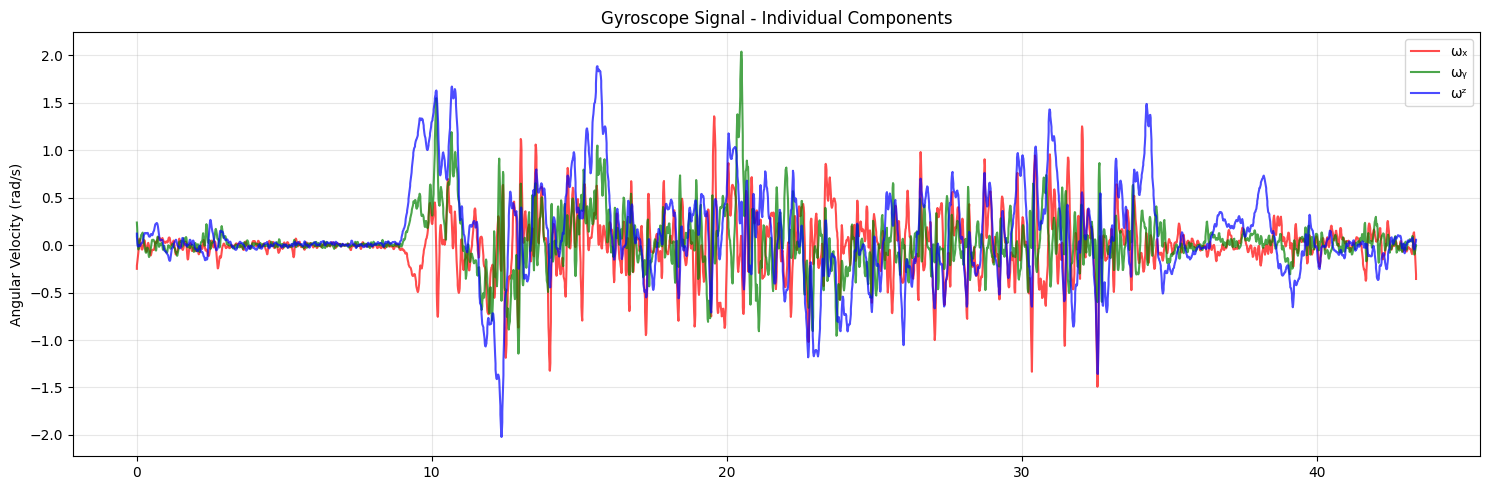

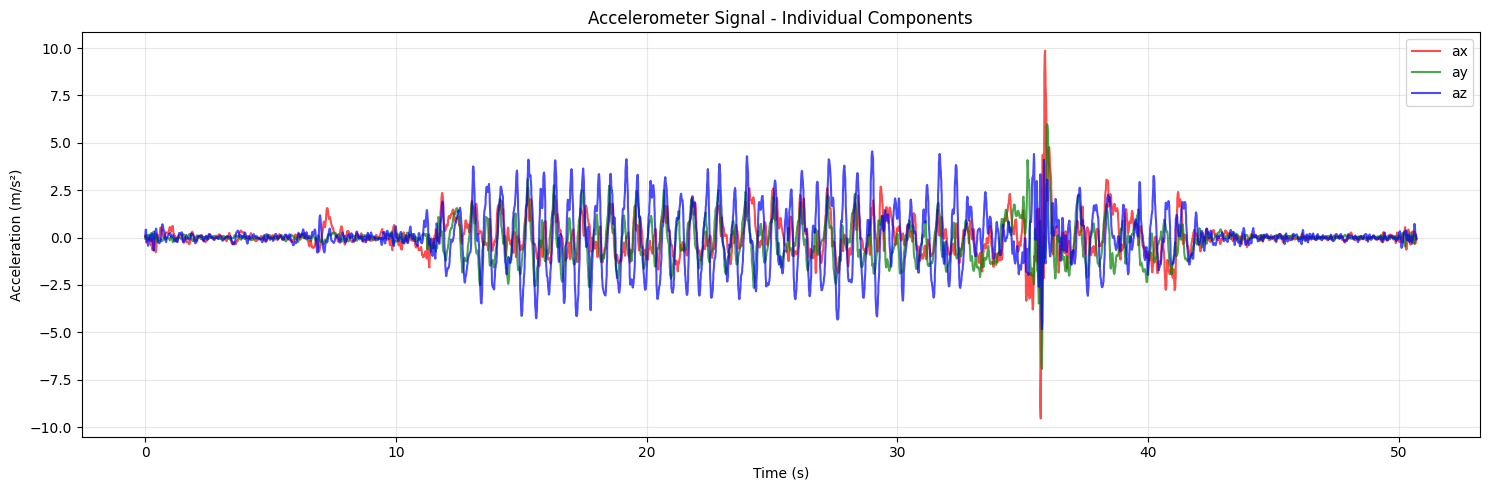

In [83]:
df_gyro = plotting_gyroscope_signal('task_1_signals/gyroscope_standing_walking.csv')
df_accel = plotting_acceleration_signal('task_1_signals/linear_acceleration_standing_walking.csv')

2. –ó–∞–ø–∏—Å–∞—Ç–∏ –∑–≤—É–∫ –∑ –∑–æ–≤–Ω—ñ—à–Ω—å–æ–≥–æ –ø—Ä–∏—Å—Ç—Ä–æ—é —Ç—Ä–∏–≤–∞–ª—ñ—Å—Ç—é 5 —Å –∑ –¥–æ–ø–æ–º–æ–≥–æ—é Python. –ó–∞–ø–∏—Å–∞—Ç–∏ –æ–¥–Ω–∞–∫–æ–≤—ñ —Ñ—Ä–∞–∑–∏ –∞–±–æ –º—É–∑–∏–∫—É –∑ —á–∞—Å—Ç–æ—Ç–æ—é –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—ó 8 –∫–ì—Ü —Ç–∞ 44.1 –∫–ì—Ü. –ü—Ä–æ—á–∏—Ç–∞—Ç–∏ –∑ —Ñ–∞–π–ª—É —Ç–∞ –ø—Ä–æ—Å–ª—É—Ö–∞—Ç–∏ –æ—Ç—Ä–∏–º–∞–Ω—ñ –∑–∞–ø–∏—Å–∏. –í–∏–≤–µ—Å—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫, –ø–æ–∑–Ω–∞—á–∏—Ç–∏ –≤—ñ—Å—ñ.

In [84]:
from scipy.signal import butter, filtfilt

def record_and_process(duration=5):
    high_sr = 44100
    
    print(f"Recording for {duration} seconds at {high_sr} Hz...")
    print("Speak now!")
    
    audio_high = sd.rec(int(duration * high_sr), 
                        samplerate=high_sr, 
                        channels=1,
                        dtype='float32')
    sd.wait()
    print("Recording finished!")
    
    audio_int_44k = np.int16(audio_high * 32767)
    wav.write("audio_44khz.wav", high_sr, audio_int_44k)
    
    low_sr = 8000
    nyquist = low_sr / 2
    b, a = butter(8, nyquist / (high_sr / 2), btype='low')
    audio_filtered = filtfilt(b, a, audio_high.flatten())
    
    decimation_factor = high_sr // low_sr
    audio_8khz = audio_filtered[::decimation_factor]
    
    audio_int_8k = np.int16(audio_8khz * 32767)
    wav.write("audio_8khz.wav", low_sr, audio_int_8k)
    
    print(f"‚úì Original saved at 44.1 kHz")
    print(f"‚úì Downsampled version saved at 8 kHz")
    
    return audio_high, audio_8khz, high_sr, low_sr

In [85]:
audio_44k, audio_8k, sr_44k, sr_8k = record_and_process(duration=5)


Recording for 5 seconds at 44100 Hz...
Speak now!
Recording finished!
‚úì Original saved at 44.1 kHz
‚úì Downsampled version saved at 8 kHz


In [86]:

print("=" * 50)
print("play")
print("=" * 50)

print("\nüîä 8 kHz (low quality):")
display(Audio("audio_8khz.wav"))

print("\nüîä 44.1 kHz (good quality):")
display(Audio("audio_44khz.wav"))

play

üîä 8 kHz (low quality):



üîä 44.1 kHz (good quality):


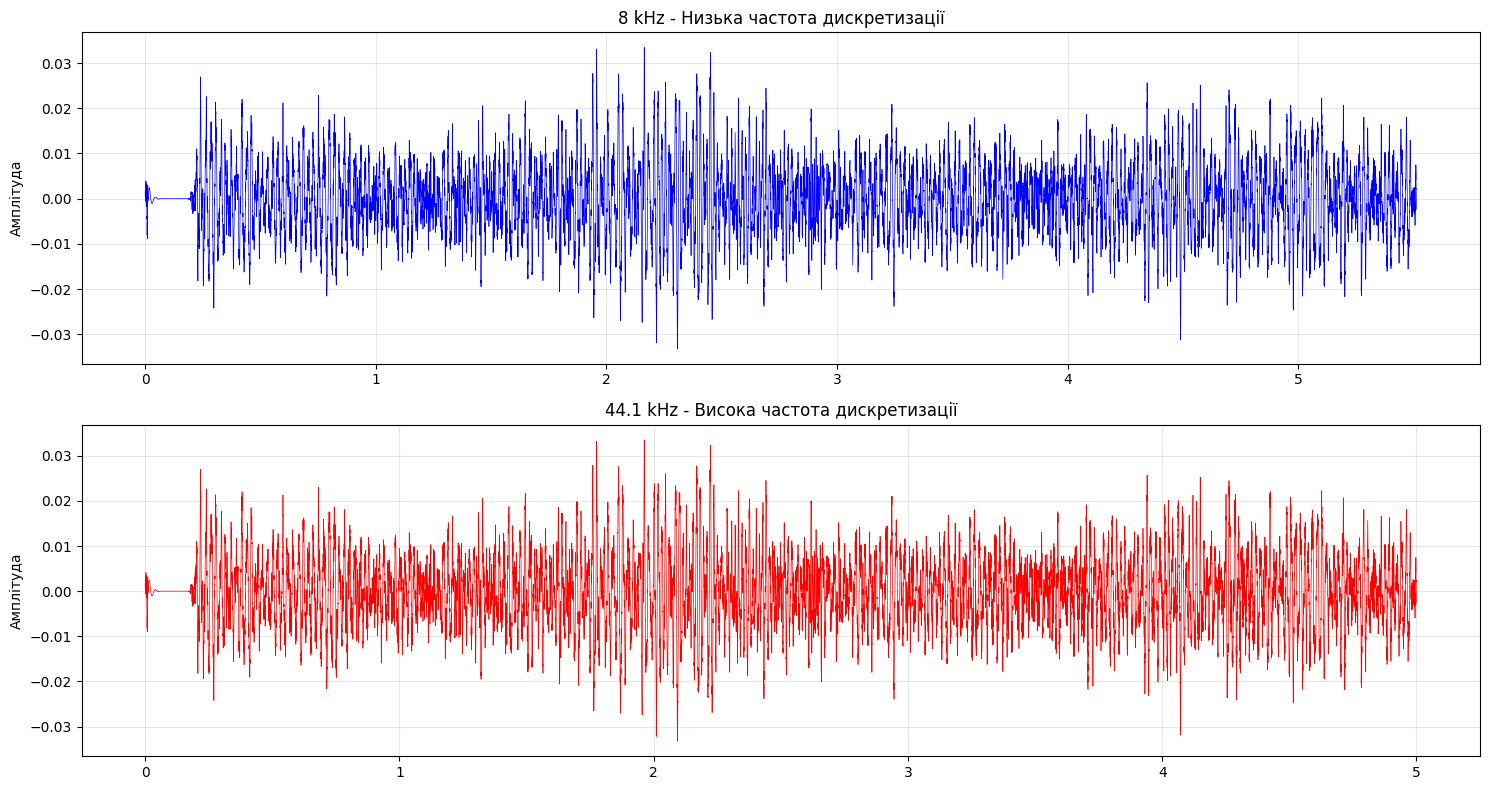

In [87]:
def plot_comparison():
    sr1, data1 = wavfile.read("audio_8khz.wav")
    sr2, data2 = wavfile.read("audio_44khz.wav")
    

    if data1.dtype == np.int16:
        data1 = data1.astype(np.float32) / 32767
    if data2.dtype == np.int16:
        data2 = data2.astype(np.float32) / 32767
    

    time1 = np.arange(len(data1)) / sr1
    time2 = np.arange(len(data2)) / sr2
    

    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    
    # 8 kHz
    axes[0].plot(time1, data1, 'b-', linewidth=0.5)
    axes[0].set_title('8 kHz - –ù–∏–∑—å–∫–∞ —á–∞—Å—Ç–æ—Ç–∞ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—ó')
    axes[0].set_ylabel('–ê–º–ø–ª—ñ—Ç—É–¥–∞')
    axes[0].grid(True, alpha=0.3)
    
    # 44.1 kHz
    axes[1].plot(time2, data2, 'r-', linewidth=0.5)
    axes[1].set_title('44.1 kHz - –í–∏—Å–æ–∫–∞ —á–∞—Å—Ç–æ—Ç–∞ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—ó')
    axes[1].set_ylabel('–ê–º–ø–ª—ñ—Ç—É–¥–∞')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    import os
    size_8k = os.path.getsize("audio_8khz.wav")
    size_44k = os.path.getsize("audio_44khz.wav")
plot_comparison()

3. –ü—Ä–æ—á–∏—Ç–∞—Ç–∏ —Å–∏–≥–Ω–∞–ª–∏ –ï–ï–ì –∑–¥–æ—Ä–æ–≤–æ—ó —Ç–∞ —Ö–≤–æ—Ä–æ—ó –ª—é–¥–∏–Ω–∏, –æ—Ç—Ä–∏–º–∞–Ω—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é –∫–æ–º–ø‚Äô—é—Ç–µ—Ä–Ω–æ–≥–æ –µ–ª–µ–∫—Ç—Ä–æ–µ–Ω—Ü–µ—Ñ–∞–ª–æ–≥—Ä–∞—Ñ–∞ —Ç–∞ –∑–±–µ—Ä–µ–∂–µ–Ω—ñ —É mat-—Ñ–∞–π–ª—ñ (MatLAB). –í–∏–≤–µ—Å—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫, –ø–æ–∑–Ω–∞—á–∏—Ç–∏ –≤—ñ—Å—ñ. –ó–±–µ—Ä–µ–≥—Ç–∏ –æ—Ç—Ä–∏–º–∞–Ω–∏–π —Å–∏–≥–Ω–∞–ª –¥–ª—è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è –≤ –Ω–∞—Å—Ç—É–ø–Ω–∏—Ö —Ä–æ–±–æ—Ç–∞—Ö.
–§–∞–π–ª–∏ –∞—Ä—Ö—ñ–≤—É EEG_healthy.rar —Ç–∞ EEG_sick.rar; –æ–±—Ä–∞—Ç–∏ –æ–¥–∏–Ω —Å–∏–≥–Ω–∞–ª; –ï–ï–ì –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–æ–≤–∞–Ω–∞ –∑ —á–∞—Å—Ç–æ—Ç–æ—é 256 –ì—Ü, –∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞–ø—Ä—É–≥–∏ –ø–æ–¥–∞–Ω–æ –≤ –º—ñ–∫—Ä–æ–≤–æ–ª—å—Ç–∞—Ö.


Signal length: 2561 samples
Duration: 10.00 seconds
Sampling rate: 256 Hz
Signal length: 2561 samples
Duration: 10.00 seconds
Sampling rate: 256 Hz
Sick signal saved as: eeg_sick_signal.npy and .csv
Healthy signal saved as: eeg_healthy_signal.npy and .csv


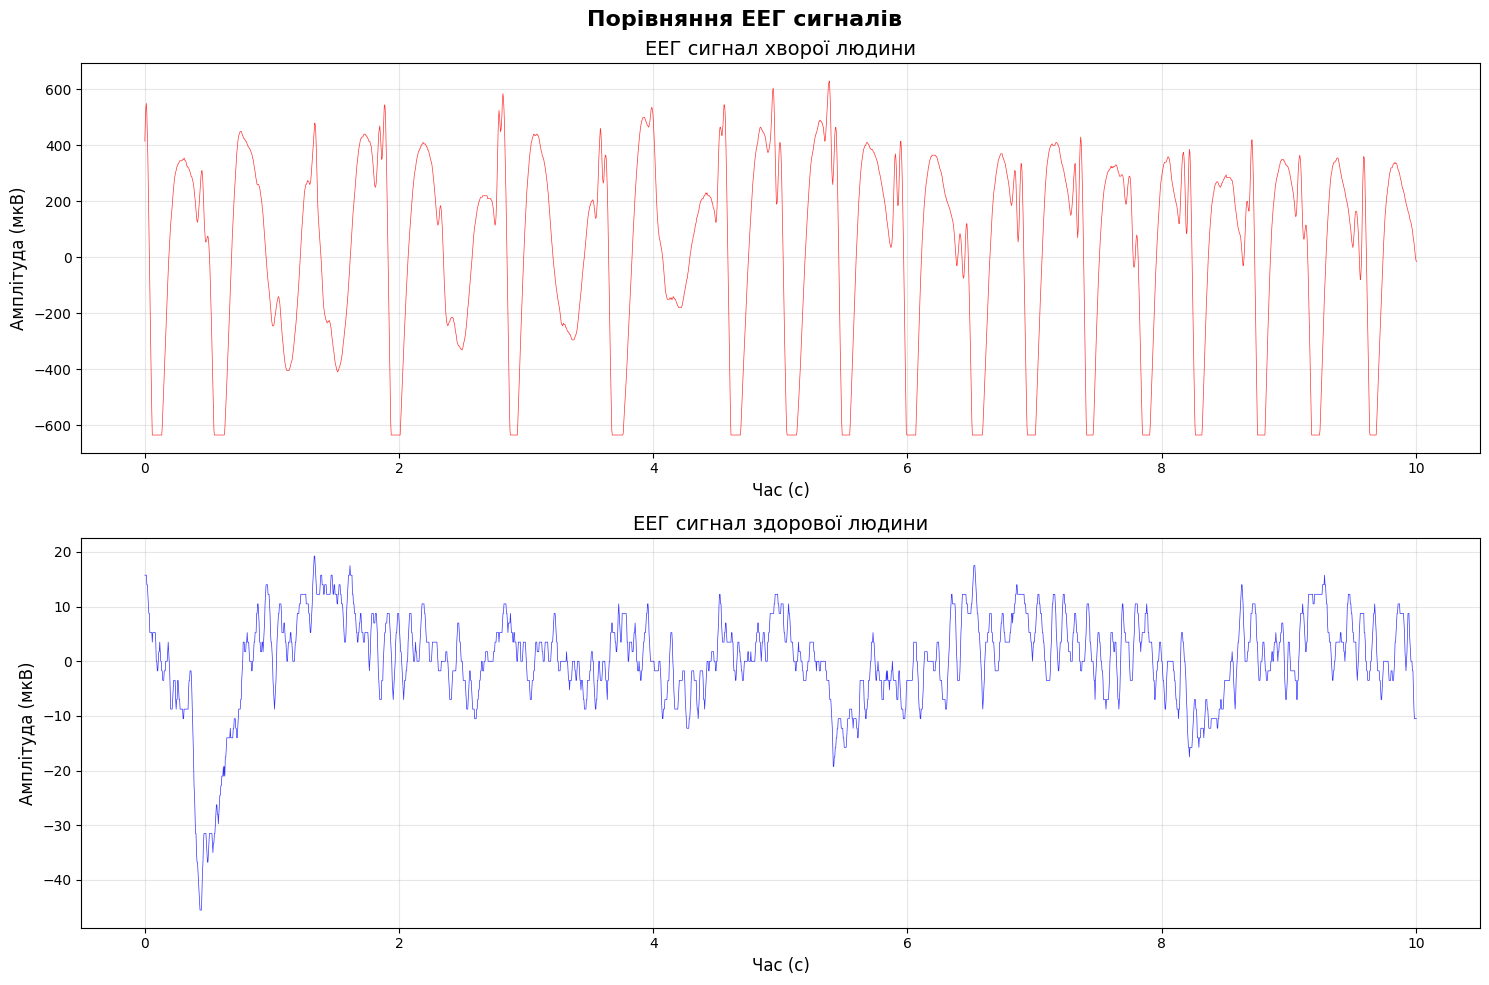

In [88]:
def process_eeg(file_path, header, sampling_rate=256):
    mat_data = sio.loadmat(file_path)
    
    eeg_signal = mat_data["sig"]

    duration, time = calculate_signal_duration(eeg_signal)
    
    if eeg_signal.ndim > 1:
        eeg_signal = eeg_signal.flatten()
    
    return eeg_signal, time, header

if __name__ == "__main__":
    eeg_sick, time_sick, header_sick = process_eeg("EEG/eeg_sick_1.mat", '–ï–ï–ì —Å–∏–≥–Ω–∞–ª —Ö–≤–æ—Ä–æ—ó –ª—é–¥–∏–Ω–∏')
    eeg_healthy, time_healthy, header_healthy = process_eeg("EEG/eeg_healthy_1.mat", '–ï–ï–ì —Å–∏–≥–Ω–∞–ª –∑–¥–æ—Ä–æ–≤–æ—ó –ª—é–¥–∏–Ω–∏')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle('–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ï–ï–ì —Å–∏–≥–Ω–∞–ª—ñ–≤', fontsize=16, fontweight='bold')
    
    ax1.plot(time_sick, eeg_sick, 'r-', linewidth=0.5, alpha=0.8)
    ax1.set_xlabel('–ß–∞—Å (—Å)', fontsize=12)
    ax1.set_ylabel('–ê–º–ø–ª—ñ—Ç—É–¥–∞ (–º–∫–í)', fontsize=12)
    ax1.set_title(header_sick, fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(time_healthy, eeg_healthy, 'b-', linewidth=0.5, alpha=0.8)
    ax2.set_xlabel('–ß–∞—Å (—Å)', fontsize=12)
    ax2.set_ylabel('–ê–º–ø–ª—ñ—Ç—É–¥–∞ (–º–∫–í)', fontsize=12)
    ax2.set_title(header_healthy, fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    np.save('eeg_sick_signal.npy', eeg_sick)
    data_sick = np.column_stack((time_sick, eeg_sick))
    np.savetxt('eeg_sick_signal.csv', data_sick,
                delimiter=',', header='Time(s),Amplitude(microvolts)', comments='')
    print("Sick signal saved as: eeg_sick_signal.npy and .csv")
    
    np.save('eeg_healthy_signal.npy', eeg_healthy)
    data_healthy = np.column_stack((time_healthy, eeg_healthy))
    np.savetxt('eeg_healthy_signal.csv', data_healthy,
                delimiter=',', header='Time(s),Amplitude(microvolts)', comments='')
    print("Healthy signal saved as: eeg_healthy_signal.npy and .csv")
    
    plt.show()

4. –ü–æ–±—É–¥—É–≤–∞—Ç–∏ —Ñ—É–Ω–∫—Ü—ñ—é –¥–ª—è –≤–∏–≤–æ–¥—É –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫ –¥—ñ–ª—è–Ω–∫–∏ —Å–∏–≥–Ω–∞–ª—ñ–≤. –í —Ñ—É–Ω–∫—Ü—ñ—é –ø–µ—Ä–µ–¥–∞–≤–∞—Ç–∏: —á–∞—Å –ø–æ—á–∞—Ç–∫—É —Ç–∞ –∑–∞–∫—ñ–Ω—á–µ–Ω–Ω—è –¥—ñ–ª—è–Ω–∫–∏ (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö), –≤–µ–∫—Ç–æ—Ä –∑ –≤—ñ–¥–ª—ñ–∫–∞–º–∏ —Å–∏–≥–Ω–∞–ª—É, —á–∞—Å—Ç–æ—Ç—É –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—ó. –ü–µ—Ä–µ–¥–±–∞—á–∏—Ç–∏ –ø–µ—Ä–µ–≤—ñ—Ä–∫—É –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—ñ –≤–≤–µ–¥–µ–Ω–Ω—è –º–æ–º–µ–Ω—Ç—ñ–≤ —á–∞—Å—É, —Ç–∞ –º–æ–∂–ª–∏–≤—ñ—Å—Ç—å –æ—Ç—Ä–∏–º–∞–Ω–Ω—è –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é —Ñ—É–Ω–∫—Ü—ñ—ó –≤–µ–∫—Ç–æ—Ä—É –∑ –≤—ñ–¥–ª—ñ–∫–∞–º–∏ –¥—ñ–ª—è–Ω–∫–∏ —Å–∏–≥–Ω–∞–ª—É —Ç–∞ –≤—ñ–¥–ª—ñ–∫–∞–º–∏ —á–∞—Å—É. –í–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ —Ñ—É–Ω–∫—Ü—ñ—é –¥–ª—è –≤–∏–≤–æ–¥—É –¥—ñ–ª—è–Ω–∫–∏ —Å–∏–≥–Ω–∞–ª—É –∑ –≤–∏–∫–æ–Ω–∞–Ω–∏—Ö –∑–∞–≤–¥–∞–Ω—å.

In [89]:
def plot_signal_segment (signal, sampling_rate, start_time, end_time, title="Signal segment", return_data = True):
    if signal is None or len(signal) == 0: 
        print ('signal is empty')
        return None
    
    total_duration = len(signal) / sampling_rate

    if start_time < 0:
        print(f"Time can not be negative number {start_time})")
        return None
    
    if end_time > total_duration:
        print(f"End time ({end_time}s) is larger than total duration ({total_duration:.2f}s)")
        return None
    
    if start_time >= end_time:
        print(f"Start time ({start_time}s) should be less than end time")
        return None
    
    start_index = max(math.ceil(start_time * sampling_rate), 0)
    end_index = min(math.floor(end_time * sampling_rate), len(signal))

    segment_signal = signal[start_index:end_index]

    segment_time = np.linspace(start_time, end_time, len(segment_signal))

    plt.figure(figsize=(14, 6))
    plt.plot(segment_time, segment_signal, 'b-', linewidth=0.8)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude (¬µV)', fontsize=12)
    plt.title(f'{title}\n[{start_time:.2f}s - {end_time:.2f}s]', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    info_text = f'Duration: {end_time-start_time:.2f}s\n'
    info_text += f'Number of counts: {len(segment_signal)}\n'
    info_text += f'Min: {np.min(segment_signal):.2f} ¬µV\n'
    info_text += f'Max: {np.max(segment_signal):.2f} ¬µV\n'
    info_text += f'Average: {np.mean(segment_signal):.2f} ¬µV'
    
    plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    if return_data:
        print(f"Segment: {len(segment_signal)} counts from {start_time:.2f}s to {end_time:.2f}s")
        return segment_time, segment_signal
    
    return None


Example of usage on the previously saved signal from task 3:

In [90]:
signal = np.load('eeg_sick_signal.npy')
plot_signal_segment(signal, 256, 10, 7)

Start time (10s) should be less than end time


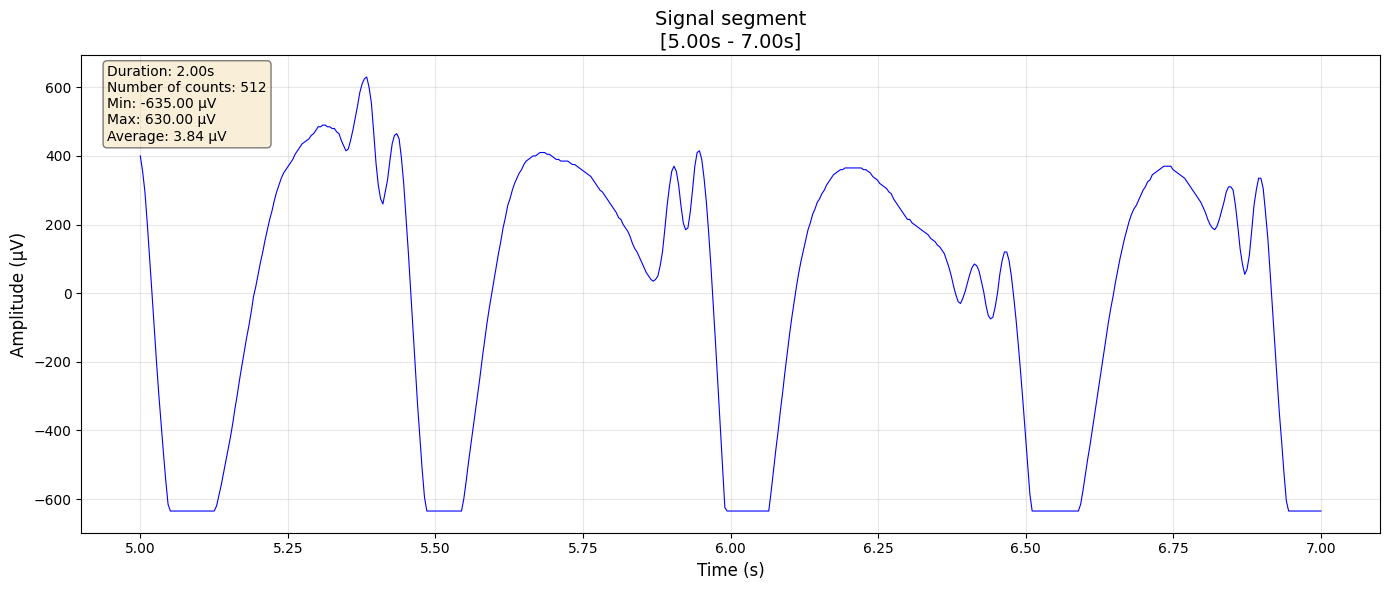

Segment: 512 counts from 5.00s to 7.00s


(array([5.        , 5.00391389, 5.00782779, 5.01174168, 5.01565558,
        5.01956947, 5.02348337, 5.02739726, 5.03131115, 5.03522505,
        5.03913894, 5.04305284, 5.04696673, 5.05088063, 5.05479452,
        5.05870841, 5.06262231, 5.0665362 , 5.0704501 , 5.07436399,
        5.07827789, 5.08219178, 5.08610568, 5.09001957, 5.09393346,
        5.09784736, 5.10176125, 5.10567515, 5.10958904, 5.11350294,
        5.11741683, 5.12133072, 5.12524462, 5.12915851, 5.13307241,
        5.1369863 , 5.1409002 , 5.14481409, 5.14872798, 5.15264188,
        5.15655577, 5.16046967, 5.16438356, 5.16829746, 5.17221135,
        5.17612524, 5.18003914, 5.18395303, 5.18786693, 5.19178082,
        5.19569472, 5.19960861, 5.2035225 , 5.2074364 , 5.21135029,
        5.21526419, 5.21917808, 5.22309198, 5.22700587, 5.23091977,
        5.23483366, 5.23874755, 5.24266145, 5.24657534, 5.25048924,
        5.25440313, 5.25831703, 5.26223092, 5.26614481, 5.27005871,
        5.2739726 , 5.2778865 , 5.28180039, 5.28

In [91]:
signal = np.load('eeg_sick_signal.npy')
plot_signal_segment(signal, 256, 5, 7)

Example of usage on signal from task 2:

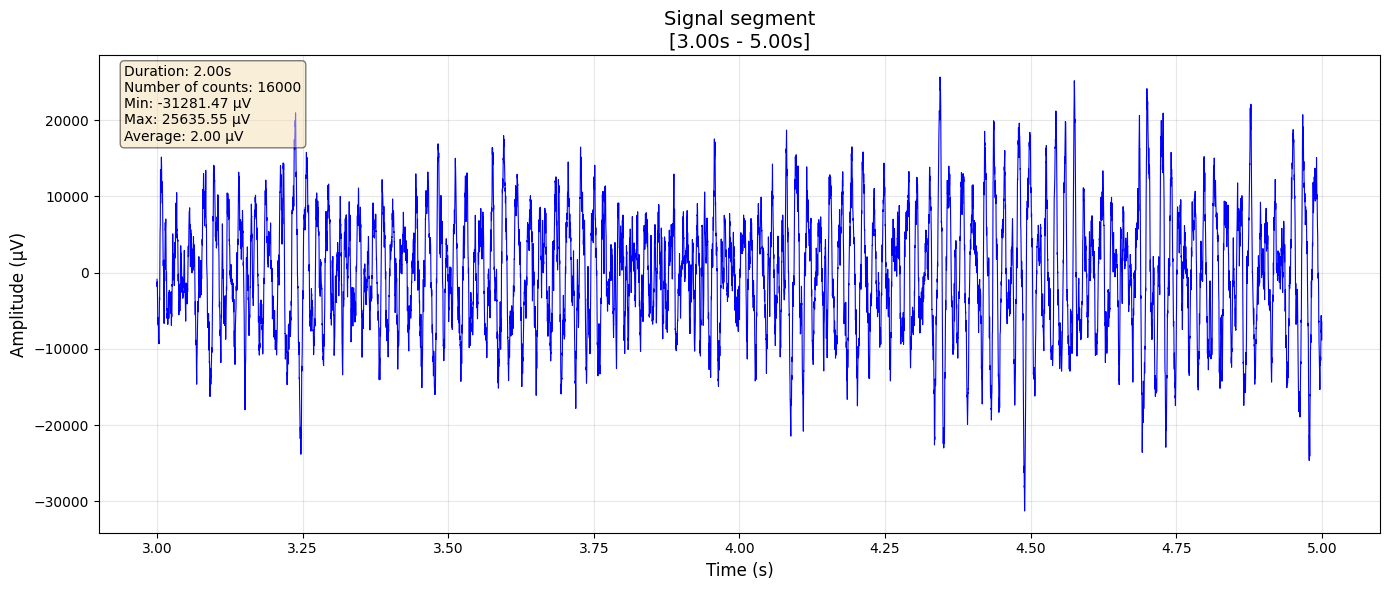

Segment: 16000 counts from 3.00s to 5.00s


(array([3.        , 3.00012501, 3.00025002, ..., 4.99974998, 4.99987499,
        5.        ]),
 array([ -885.0368, -1434.37  , -1861.629 , ..., -8850.368 , -7721.183 ,
        -6500.4424], dtype=float32))

In [92]:
sr1, signal = wavfile.read("audio_8khz.wav")

if signal.dtype == np.int16:
    signal = signal.astype(np.float32) / 32767
signal = signal * 1000000

plot_signal_segment(signal, 8000, 3, 5)

# 7

–ü—Ä–æ—á–∏—Ç–∞—Ç–∏ —Å–∏–≥–Ω–∞–ª–∏ —Å—Ç–∞–±—ñ–ª–æ–≥—Ä–∞–º–∏ –ª—é–¥–∏–Ω–∏, —â–æ –±—É–ª–∏ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é –ø–ª–∞—Ç—Ñ–æ—Ä–º–∏ Wii Balance Board (https://en.wikipedia.org/wiki/Wii_Balance_Board). –í –ø–∞–ø—Ü—ñ data –ø—Ä–∏—Å—É—Ç–Ω—ñ —Å–∏–≥–Ω–∞–ª–∏ –¥–ª—è –¥–≤–æ—Ö –≥—Ä—É–ø —Å–ø–æ—Ä—Ç—Å–º–µ–Ω—ñ–≤ - –≥—Ä–∞–≤—Ü—ñ–≤ –≤ –≥–∞–Ω–¥–±–æ–ª —Ç–∞ –∞–∫—Ä–æ–±–∞—Ç—ñ–≤, handball —Ç–∞ acrobats –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ. –ö–æ–∂–Ω–∏–π —Ç–∏–ø —Å–ø–æ—Ä—Ç—Å–º–µ–Ω—ñ–≤ –≤–∏–∫–æ–Ω—É–≤–∞–≤ –ø–µ–≤–Ω—ñ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏:

- base_close - —Å—Ç–æ—è—Ç–∏ —Ä—ñ–≤–Ω–æ, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –∑–∞–∫—Ä–∏—Ç—ñ
- base_open - —Å—Ç–æ—è—Ç–∏ —Ä—ñ–≤–Ω–æ, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –≤—ñ–¥–∫—Ä–∏—Ç—ñ
- sway_front-back_30 - –ø–æ–∫–∞—á—É–≤–∞–Ω–Ω—è –≤–ø–µ—Ä–µ–¥-–Ω–∞–∑–∞–¥ –ø—ñ–¥ –∫—É—Ç–æ–º 30 –≥—Ä–∞–¥—É—Å—ñ–≤, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –≤—ñ–¥–∫—Ä–∏—Ç—ñ
- sway_front_back_60 - –ø–æ–∫–∞—á—É–≤–∞–Ω–Ω—è –≤–ø–µ—Ä–µ–¥-–Ω–∞–∑–∞–¥ –ø—ñ–¥ –∫—É—Ç–æ–º 60 –≥—Ä–∞–¥—É—Å—ñ–≤, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –≤—ñ–¥–∫—Ä–∏—Ç—ñ
- sway_left-right_30 - –ø–æ–∫–∞—á—É–≤–∞–Ω–Ω—è –≤–ª—ñ–≤–æ-–≤–ø—Ä–∞–≤–æ –ø—ñ–¥ –∫—É—Ç–æ–º 30 –≥—Ä–∞–¥—É—Å—ñ–≤, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –≤—ñ–¥–∫—Ä–∏—Ç—ñ
- sway_left-right_60 - –ø–æ–∫–∞—á—É–≤–∞–Ω–Ω—è –≤–ª—ñ–≤–æ-–≤–ø—Ä–∞–≤–æ –ø—ñ–¥ –∫—É—Ç–æ–º 60 –≥—Ä–∞–¥—É—Å—ñ–≤, –Ω–æ–≥–∏ —Ä–∞–∑–æ–º, –æ—á—ñ –≤—ñ–¥–∫—Ä–∏—Ç—ñ

### –í–∏–∫–æ–Ω–∞—Ç–∏ —Ç–∞–∫—ñ –∑–∞–≤–¥–∞–Ω–Ω—è:
1) –ü—Ä–æ—á–∏—Ç–∞—Ç–∏ —Å–∏–≥–Ω–∞–ª–∏ CoP (Center-of-Pressure) —Å—Ç–∞–±—ñ–ª–æ–≥—Ä–∞–º —Å–ø–æ—Ä—Ç—Å–º–µ–Ω—ñ–≤, —â–æ —Å–ø–µ—Ü—ñ–∞–ª—ñ–∑—É—é—Ç—å—Å—è –Ω–∞ —Ä—ñ–∑–Ω–∏—Ö –≤–∏–¥–∞—Ö —Å–ø–æ—Ä—Ç—É. –î–ª—è —Ü—å–æ–≥–æ –ø—Ä–æ–ø–æ–Ω—É—î–º–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ —Ñ—É–Ω–∫—Ü—ñ—é read_csv –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏ —Ä–æ–±–æ—Ç–∏ –∑ —Ç–∞–±–ª–∏—á–Ω–∏–º–∏ –¥–∞–Ω–∏–º–∏ Pandas. –ü–æ–±—É–¥—É–≤–∞—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫–∏ (–≤ –ø—Ä–æ—Ç–æ–∫–æ–ª –≤–∫–ª—é—á–∏—Ç–∏ –∫—ñ–ª—å–∫–∞ –≥—Ä–∞—Ñ—ñ–∫—ñ–≤ –¥–ª—è –ø—Ä–∏–∫–ª–∞–¥—É). 

    –ü–æ—Ä—è–¥–æ–∫ —Å—Ç–æ–≤–ø—Ü—ñ–≤ –≤ —Ñ–∞–π–ª—ñ:
    - time_ms - time in ms [column0]
    - top_left_f_kg - raw top_left sensor data [column1]
    - top_right_f_kg = raw top_right sensor data [column2]
    - bottom_left_f_kg = raw bottom_left sensor data [column3]
    - bottom_right_f_kg = raw bottom_right sensor data [column4]
    - cop_x = CoP X axis, mm [column5]
    - cop_y = CoP Y axis, mm [column6]
    - total_f = Total force [column7]

2) –û–±—Ä–∞—Ç–∏ –±—É–¥—å-—è–∫—ñ –¥–≤–∞ —Ç–∏–ø–∏ —Å–∏–≥–Ω–∞–ª—ñ–≤ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, base-open —Ç–∞ sway_left-right_60) –¥–ª—è –¥–≤–æ—Ö —Ç–∏–ø—ñ–≤ —Å–ø–æ—Ä—Ç—Å–º–µ–Ω—ñ–≤. 

3) –î–ª—è –∫–æ–∂–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª—É –≤ –ø–∞–ø—Ü—ñ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ —Ç–∏–ø—É –ø–æ—Ä–∞—Ö—É–≤–∞—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ (—Å–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è, –º–µ–¥—ñ–∞–Ω–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è, —Å–µ—Ä–µ–¥–Ω—î –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è), –æ–∫—Ä–µ–º–æ –ø–æ –æ—Å—è–º –• —Ç–∞ Y, –∑–≤–µ—Å—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—é.
 


Reading stabilogram data:

In [93]:
def read_stabilogram_data(file_path):
    column_names = [
        'time_ms',          
        'top_left_f_kg',    
        'top_right_f_kg',   
        'bottom_left_f_kg', 
        'bottom_right_f_kg',
        'cop_x',            
        'cop_y',            
        'total_f'           
    ]
    try:
        df = pd.read_csv(file_path, sep='\s+', header=None,names=column_names)
        df['time_s'] = (df['time_ms'] - df['time_ms'].iloc[0]) / 1000.0
        return df
    
    except Exception as e:
        print(f"Exception while reading in {file_path}: {e}")
        return None

Plot for CoP Trajectory:

In [94]:
def plot_cop_trajectory(df, title="CoP trajectory", save_path=None):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # CoP trajectory in 2d
    ax1 = axes[0, 0]
    ax1.plot(df['cop_x'], df['cop_y'], 'b-', linewidth=0.5, alpha=0.7)
    ax1.scatter(df['cop_x'].iloc[0], df['cop_y'].iloc[0], 
                c='green', s=100, marker='o', label='Start', zorder=5)
    ax1.scatter(df['cop_x'].iloc[-1], df['cop_y'].iloc[-1], 
                c='red', s=100, marker='s', label='Finish', zorder=5)
    ax1.set_xlabel('CoP X (mm)', fontsize=11)
    ax1.set_ylabel('CoP Y (mm)', fontsize=11)
    ax1.set_title('Trajectory CoP', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.axis('equal')
    
    # CoP x
    ax2 = axes[0, 1]
    ax2.plot(df['time_s'], df['cop_x'], 'r-', linewidth=0.8, alpha=0.8)
    ax2.set_xlabel('Time (s)', fontsize=11)
    ax2.set_ylabel('CoP X (mm)', fontsize=11)
    ax2.set_title('CoP oscillation along the X axis', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # stats
    stats_x = f'Average: {df["cop_x"].mean():.2f} mm\n'
    stats_x += f'STD: {df["cop_x"].std():.2f} mm\n'
    stats_x += f'Range: {df["cop_x"].max() - df["cop_x"].min():.2f} mm'
    ax2.text(0.02, 0.98, stats_x, transform=ax2.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # CoP Y
    ax3 = axes[1, 0]
    ax3.plot(df['time_s'], df['cop_y'], 'g-', linewidth=0.8, alpha=0.8)
    ax3.set_xlabel('Time (—Å)', fontsize=11)
    ax3.set_ylabel('CoP Y (mm)', fontsize=11)
    ax3.set_title('CoP oscillation along the Y axis', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # stats
    stats_y = f'Average: {df["cop_y"].mean():.2f} mm\n'
    stats_y += f'STD: {df["cop_y"].std():.2f} mm\n'
    stats_y += f'Range: {df["cop_y"].max() - df["cop_y"].min():.2f} mm'
    ax3.text(0.02, 0.98, stats_y, transform=ax3.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    # force
    ax4 = axes[1, 1]
    ax4.plot(df['time_s'], df['total_f'], 'm-', linewidth=0.8, alpha=0.8)
    ax4.set_xlabel('Time (s)', fontsize=11)
    ax4.set_ylabel('Total force (kg)', fontsize=11)
    ax4.set_title('Total force', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # stats
    stats_f = f'average: {df["total_f"].mean():.2f} kg\n'
    stats_f += f'STD: {df["total_f"].std():.2f} kg\n'
    stats_f += f'Min: {df["total_f"].min():.2f} kg\n'
    stats_f += f'Max: {df["total_f"].max():.2f} kg'
    ax4.text(0.02, 0.98, stats_f, transform=ax4.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='plum', alpha=0.5))
    
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig


Example of usage on acrobat base close file:

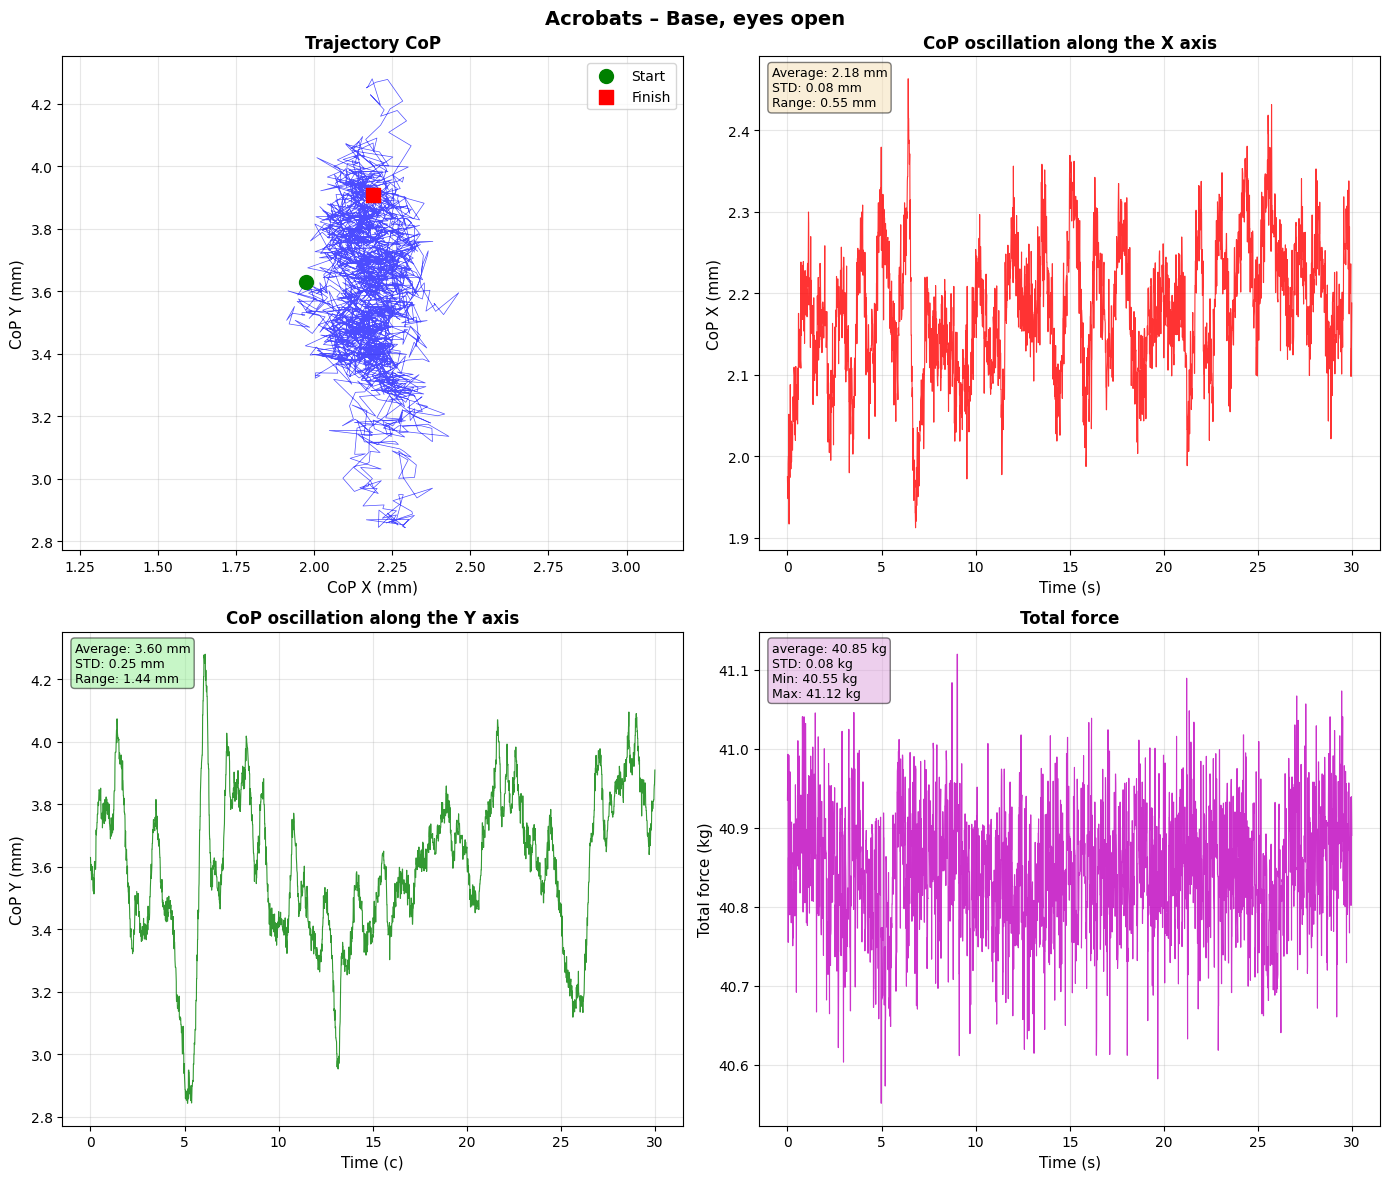

In [95]:
if __name__ == "__main__":
    sample_file = "data/acrobats/base_close/11.csv"
    
    if os.path.exists(sample_file):
        df = read_stabilogram_data(sample_file)
        if df is not None:
            plot_cop_trajectory(df, title="Acrobats ‚Äì Base, eyes open") 

Applying task 4 in task 7

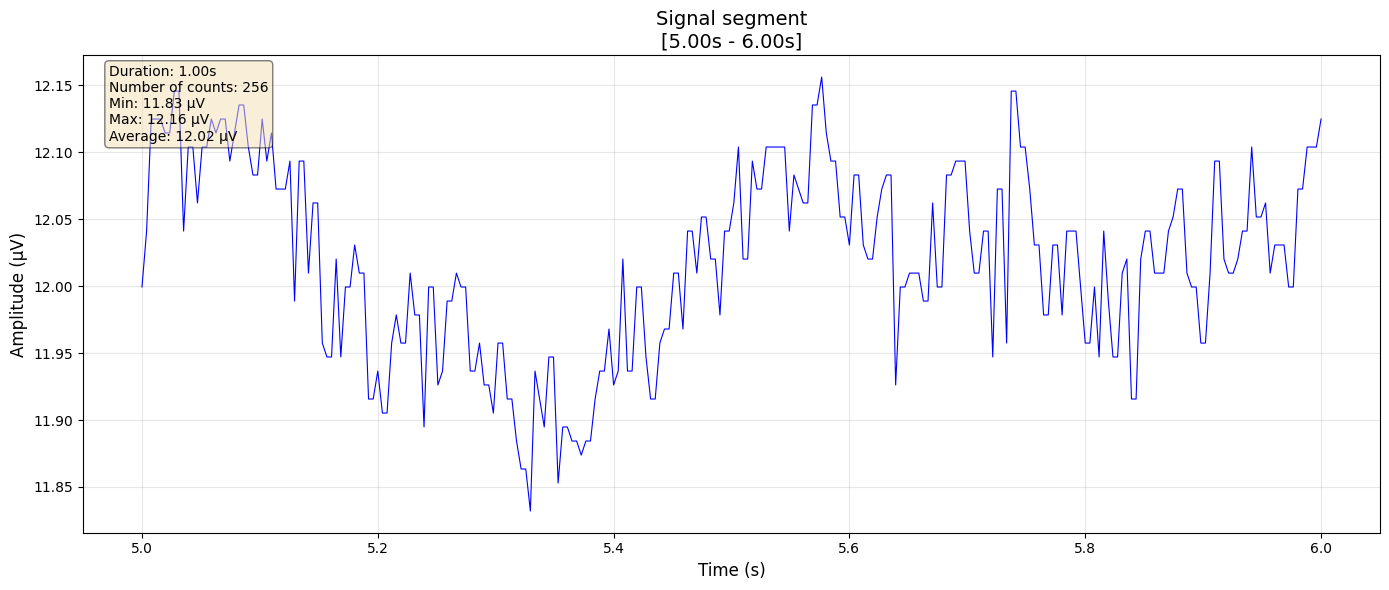

Segment: 256 counts from 5.00s to 6.00s


(array([5.        , 5.00392157, 5.00784314, 5.01176471, 5.01568627,
        5.01960784, 5.02352941, 5.02745098, 5.03137255, 5.03529412,
        5.03921569, 5.04313725, 5.04705882, 5.05098039, 5.05490196,
        5.05882353, 5.0627451 , 5.06666667, 5.07058824, 5.0745098 ,
        5.07843137, 5.08235294, 5.08627451, 5.09019608, 5.09411765,
        5.09803922, 5.10196078, 5.10588235, 5.10980392, 5.11372549,
        5.11764706, 5.12156863, 5.1254902 , 5.12941176, 5.13333333,
        5.1372549 , 5.14117647, 5.14509804, 5.14901961, 5.15294118,
        5.15686275, 5.16078431, 5.16470588, 5.16862745, 5.17254902,
        5.17647059, 5.18039216, 5.18431373, 5.18823529, 5.19215686,
        5.19607843, 5.2       , 5.20392157, 5.20784314, 5.21176471,
        5.21568627, 5.21960784, 5.22352941, 5.22745098, 5.23137255,
        5.23529412, 5.23921569, 5.24313725, 5.24705882, 5.25098039,
        5.25490196, 5.25882353, 5.2627451 , 5.26666667, 5.27058824,
        5.2745098 , 5.27843137, 5.28235294, 5.28

In [96]:
plot_signal_segment(df['bottom_left_f_kg'].values, 256, 5, 6)

1) –û–±—Ä–∞—Ç–∏ –±—É–¥—å-—è–∫—ñ –¥–≤–∞ —Ç–∏–ø–∏ —Å–∏–≥–Ω–∞–ª—ñ–≤ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, base-open —Ç–∞ sway_left-right_60) –¥–ª—è –¥–≤–æ—Ö —Ç–∏–ø—ñ–≤ —Å–ø–æ—Ä—Ç—Å–º–µ–Ω—ñ–≤. 

2) –î–ª—è –∫–æ–∂–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª—É –≤ –ø–∞–ø—Ü—ñ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ —Ç–∏–ø—É –ø–æ—Ä–∞—Ö—É–≤–∞—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ (—Å–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è, –º–µ–¥—ñ–∞–Ω–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è, —Å–µ—Ä–µ–¥–Ω—î –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è), –æ–∫—Ä–µ–º–æ –ø–æ –æ—Å—è–º –• —Ç–∞ Y, –∑–≤–µ—Å—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—é.


In [97]:
def stats_val_calculation(folder):
    contents = os.listdir(folder)
    all_dfs = []
    
    for file in contents:
        file_path = os.path.join(folder, file)        
        df = read_stabilogram_data(file_path)
        all_dfs.append(df)
    combined_df = pd.concat(all_dfs, ignore_index=True)

    average_vals = {k: round(v, 2) for k, v in combined_df.mean().items()}
    medians = {k: round(v, 2) for k, v in combined_df.median().items()}
    stds = {k: round(v, 2) for k, v in combined_df.std().items()}

    # print (medians)
    # print(average_vals)
    # print (stds)

    return {'medians': medians, 'average_vals': average_vals, 'stds': stds}

sportsmen = ["acrobats", "handball"]
kinds_of_signals = ['base_open', 'sway_left-right_60']

sets_of_values = [['data/'+i+ '/' + j for j in kinds_of_signals] for i in sportsmen]
flat = [item for sublist in sets_of_values for item in sublist]
result = stats_val_calculation('data/acrobats/base_open')
result = {i:stats_val_calculation(i) for i in flat}

In [98]:
def create_html_comparison(data, parameters=['cop_x', 'cop_y', 'total_f', 'top_left_f_kg', 'top_right_f_kg', 'bottom_right_f_kg', 'bottom_left_f_kg']):
    """
    Creates HTML table for Jupyter
    """
    from IPython.display import HTML, display
    
    for param in parameters:
        html = f"<h3>Parameter: {param}</h3>"
        html += "<table border='1' style='border-collapse: collapse;'>"
        html += "<tr><th>Experiment</th><th>Mean<br>(Acr/Hand)</th><th>Median<br>(Acr/Hand)</th><th>STD<br>(Acr/Hand)</th></tr>"
        
        experiments = sorted(set([key.split('/')[-1] for key in data.keys()]))
        
        for exp in experiments:
            acr_key = f'data/acrobats/{exp}'
            hand_key = f'data/handball/{exp}'
            
            if acr_key in data and param in data[acr_key]['average_vals']:
                acr_mean = data[acr_key]['average_vals'][param]
                acr_median = data[acr_key]['medians'][param]
                acr_std = data[acr_key]['stds'][param]
                
                hand_mean = data[hand_key]['average_vals'][param]
                hand_median = data[hand_key]['medians'][param]
                hand_std = data[hand_key]['stds'][param]
                
                mean_cell = f"<span style='color:{'yellow' if acr_mean < hand_mean else 'red'}'>{acr_mean:.2f}</span> / "
                mean_cell += f"<span style='color:{'yellow' if hand_mean < acr_mean else 'red'}'>{hand_mean:.2f}</span>"
                
                median_cell = f"<span style='color:{'yellow' if acr_median < hand_median else 'red'}'>{acr_median:.2f}</span> / "
                median_cell += f"<span style='color:{'yellow' if hand_median < acr_median else 'red'}'>{hand_median:.2f}</span>"
                
                std_cell = f"<span style='color:{'yellow' if acr_std < hand_std else 'red'}'>{acr_std:.2f}</span> / "
                std_cell += f"<span style='color:{'yellow' if hand_std < acr_std else 'red'}'>{hand_std:.2f}</span>"
                
                html += f"<tr><td>{exp}</td>"
                html += f"<td>{mean_cell}</td>"
                html += f"<td>{median_cell}</td>"
                html += f"<td>{std_cell}</td></tr>"
        
        html += "</table>"
        display(HTML(html))

create_html_comparison(result)